# Overview

This notebook provides an overview and a consistency check of the German dataset, which was collected by searching for potential APC-patterns in the [DWDS Kernkorpus (1900-1999)](https://www.dwds.de/d/korpora/kern). The raw annotated data cannot be made available here for copyright reasons. This notebook only contains a small number of examples to illustrate the relevant patterns or exceptions to clarify the research context.

# Preamble

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_colwidth', None)


# DWDS (German data)

In [4]:
dwds = pd.read_csv('../data/copyright/DWDS_APC_main.csv',index_col='ID')

/tmp/ipykernel_506971/4155953049.py:1: DtypeWarning: Columns (14,18,20,24,26,27,28,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dwds = pd.read_csv('../data/copyright/DWDS_APC_main.csv',index_col='ID')


In [5]:
dwds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45539 entries, 0 to 45538
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Search          45538 non-null  object 
 1   No.             45539 non-null  object 
 2   Date            45539 non-null  object 
 3   Genre           45539 non-null  object 
 4   Bibl            45539 non-null  object 
 5   ContextBefore   45329 non-null  object 
 6   Hit             45539 non-null  object 
 7   ContextAfter    45223 non-null  object 
 8   incl            45539 non-null  int64  
 9   APC             6493 non-null   object 
 10  Pron            6512 non-null   object 
 11  N               6513 non-null   object 
 12  Nlemma          6504 non-null   object 
 13  doubled         82 non-null     object 
 14  comment         711 non-null    object 
 15  Nprops          1412 non-null   object 
 16  GenderA         268 non-null    object 
 17  StrengthA       175 non-null    obje

In [6]:
dwds.head().T

ID,0,1,2,3,4
Search,ich $p=N*,ich $p=N*,ich $p=N*,ich $p=N*,ich $p=N*
No.,1,2,3,4,5
Date,1959-12-31,1959-12-31,1959-12-31,1999-02-15,1900-10-27
Genre,Belletristik,Belletristik,Belletristik,Belletristik,Belletristik
Bibl,"Strittmatter, Erwin: Pony Pedro, Berlin: Kinderbuchverl. 1959, S. 11","Strittmatter, Erwin: Pony Pedro, Berlin: Kinderbuchverl. 1959, S. 27","Strittmatter, Erwin: Pony Pedro, Berlin: Kinderbuchverl. 1959, S. 150","Salbader, 1999, Nr. 24","Brief von Wilhelm Busch an Johanna Keßler vom 27.10.1900. In: ders., Gesammelte Werke, Berlin: Directmedia Publ. 2002 [1900], S. 5353"
ContextBefore,"Und es war das erste Mal, daß ich für mein Pony log.",Wir hatten Eindruck gemacht.,Wieder zieht mich das Leben in sein gesundes Getümmel.,NaN,Liebste Tante!
Hit,ALS ICH PEDRO ZUM ERSTEN MAL SAH,WESHALB ICH BLUMEN BEZAHLENMUSSTE,WAS ICH BEI EINEM HENGSTKAMPF LERNTE,ICH SCHEISS AUF DRAG-QUEENS,"Ich gratulire zum Urenkelchen No 2. - Zunächst, scheint's, braucht man nicht bange zu sein, daß das Menschengeschlecht alle wird. -"
ContextAfter,"Auf dem Hofe des Ponyverkäufers kreischte eine Kreissäge, eine Hobelmaschine seufzte dazu.",Die Sonne ging rot auf.,"Auf unserem Kiesberg, wo die Hungerblumen mit gelben Augen in den blauen Himmel schaun und der silbergraue Schafschwingel still vor sich hin wächst, ist Axels Reich.","Für jeden ständigen Homo kommt einmal der Zeitpunkt, wo er sich entscheiden muß, Tunte zu werden oder weiterhin als Dorfschwuler durch die Gegend zu laufen.",Auch bei uns hier wird demnächst ein Zuwachs der Familie erwartet.
incl,0,0,0,0,0
APC,NaN,NaN,NaN,NaN,NaN


In [7]:
dwds.describe()

,incl,NumNDiff,AdjPost,PreN-weight
count,45539.000000,32.0,33.000000,1484.000000
mean,0.213202,1.0,1.030303,1.060647
std,0.755716,0.0,0.174078,0.329021
min,0.000000,1.0,1.000000,1.000000
25%,0.000000,1.0,1.000000,1.000000
50%,0.000000,1.0,1.000000,1.000000
75%,0.000000,1.0,1.000000,1.000000
max,7.000000,1.0,2.000000,9.000000


## Normalisation

### `instance`

*Overview of annotation codes*

0
:   no APC

1
:   APC

2
:   unclear (all cases cleared up here)

3
:   cases of coordination (lines doubled to retain each lemma)

4
:   sentences that appear to be doubled in list (i.e. identical quote with identical source identification found elswhere)

5
:   pronouns in combination with quantifier or number (e.g. *wir vier* 'the four of us', *wir beide* 'us two')

6
:   possible cases of (close?) apposition, typically involving proper name

7
:   cases of APCs (=1) that raised questions for further manual coding (not relevant here)

In [8]:
dwds.incl.unique()

array([0, 1, 6, 3, 4, 7, 5])

In [9]:
dwds.value_counts('incl')

incl
0    38912
1     5950
7      238
5      220
6      107
3       97
4       15
Name: count, dtype: int64

<Axes: xlabel='incl', ylabel='count'>

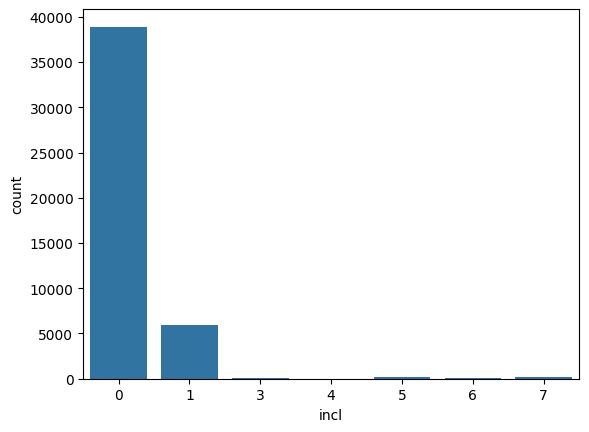

In [10]:
sns.countplot(dwds, x='incl')

In [11]:
dwds.loc[dwds.incl==3, ['Hit','APC']].head()

,Hit,APC
ID,,
119,"»Ich irrdisches Geschöpff und Schertz der Sterblichkeit«, schreibt Lohenstein.",ich irrdisches Geschöpff und Schertz der Sterblichkeit
6994,"Das geschah für dich, du Unbewußter, dachte er, und für mich Denkenden, Fühlenden und Ringenden gab's nur ein Erblühen, für meinen Schaffenstrieb nur eine unter den Stacheln der Werdensqual entstandene, in Qualen wieder vernichtete Frucht.","mich Denkenden, Fühlenden und Ringenden"
6995,"Das geschah für dich, du Unbewußter, dachte er, und für mich Denkenden, Fühlenden und Ringenden gab's nur ein Erblühen, für meinen Schaffenstrieb nur eine unter den Stacheln der Werdensqual entstandene, in Qualen wieder vernichtete Frucht.","mich Denkenden, Fühlenden und Ringenden"
11718,(A. Mangelsdorff und die Big Band des belg. Rundfunks); Ich armes Mädchen und Motherless Child (J.-Fr.Oktett mit A. Mangelsdorff und Gerd Dudek).,ich armes Mädchen und Motherless Child
13532,"Es war sehr komisch, wie ich da als Prüfling saß, ich ordentlicher Professor und Senator der TH, der ich 1914 mit dem Kolloquium mein letztes Examen gemacht zu haben glaubte und in den folgenden zwanzig Jahren so oft selber geprüft habe.",ich ordentlicher Professor und Senator der TH


Action plan:

- delete rows with incl==4: removing doubles
- columns with incl==3 can also be deleted: as the full APC string should be retained in the 'APC' column, so these are just doubles for current purposes
- set incl==6 to 0: we're not going to deal with appositives here and annotations are a bit iffy for this category anyway
- set incl==7 to 1: these were originally 1s, with questions raised for an annotation step that does not concern us here (and may be abandoned anyway)

**target-related decision regarding incl==5**
- set rows with incl==5 to incl==0 because we don't want to consider expressions like *wir vier* (for now?) 

In [12]:
dwds = dwds[~dwds.incl.isin([3, 4])]

In [13]:
dwds.loc[dwds.incl.isin([5,6]),'incl'] = 0 

In [14]:
dwds.loc[dwds.incl == 7,'incl'] = 1

## Value checks

Check for NaN values overall first.

In [15]:
dwds.isna().sum()

Search                0
No.                   0
Date                  0
Genre                 0
Bibl                  0
ContextBefore       209
Hit                   0
ContextAfter        316
incl                  0
APC               39038
Pron              39019
N                 39018
Nlemma            39027
doubled           45347
comment           44738
Nprops            44035
GenderA           45164
StrengthA         45258
NumNDiff          45395
Person                0
Number             4515
Case              39078
PostN             44914
PostN-weight      44918
PostN-cat         44922
Poss              45419
PossPN            45421
AdjPre                4
AdjPre1           44089
AdjPre2           45375
AdjPost           45394
AdjPost1          45394
AdjPost2          45426
AdjModStrength    45426
Quant             45269
QuantPos          45270
PreN-other        45412
PreN-weight       43956
ClauseType        39092
VerbPos           40251
Func              39087
Position        

This is looking fine, the crucial columns where there should be no NaN values are `Hit` and `incl`. `APC` looks plausible, we should double check that there are no NaN values there when `incl==1` (that's when `APC` will be needed for marking the target construction).

In [16]:
dwds.loc[(dwds.incl == 1) & dwds.APC.isna(),['Hit','APC']]

,Hit,APC
ID,,


There was one missing value here, fixed upstream!

For reference, here's what was fixed:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Hit</th>
      <th>APC</th>
    </tr>
    <tr>
      <th>ID</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>17101</th>
      <td>O du Sommertag über den Bergen, wie wunderschön bist du!</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

### Person
Check values for Person and Number (though probably not used for training)

In [17]:
dwds.Person.unique()

array([1, 2, '1', '2', '2Hon', '3Hon'], dtype=object)

Unique values for person need to be normalised to strings.

In [18]:
dwds.loc[dwds['Person'].isin([1,2]), 'Person'] = dwds.loc[dwds['Person'].isin([1,2]), 'Person'].astype(str)

In [19]:
dwds.Person.unique()

array(['1', '2', '2Hon', '3Hon'], dtype=object)

### Number

In [20]:
dwds.Number.unique()

array(['sg', 'pl', nan, 'Sg', 'Pl'], dtype=object)

There are nan values and cases of inconsistent capitalisation. I'll fix the latter first. 

In [21]:
dwds.Number.value_counts()

Number
pl    20578
sg    20322
Sg        6
Pl        6
Name: count, dtype: int64

Normalise `Pl` to `pl` and `Sg` to `sg`.

In [22]:
dwds.loc[dwds.Number.isin(['Sg','Pl']), 'Number'] = dwds.loc[dwds.Number.isin(['Sg','Pl']), 'Number'].str.lower()

Turning to the nan values, check if there are any cases of `incl==1` with no value for number.

In [23]:
dwds.loc[(dwds['Number'].isna()) & (dwds['incl'] ==1 )]

,Search,No.,Date,Genre,Bibl,ContextBefore,Hit,ContextAfter,incl,APC,...,AdjPost2,AdjModStrength,Quant,QuantPos,PreN-other,PreN-weight,ClauseType,VerbPos,Func,Position
ID,,,,,,,,,,,,,,,,,,,,,


There was one instance, fixed manually at source (ID 42530).

Now check which Person values are associated with null values for Number.

In [24]:
dwds.loc[dwds['Number'].isna(),'Person'].value_counts()

Person
3Hon    4515
Name: count, dtype: int64

They're all cases of "Sie", where singular and plural can be distinguished only by contextual inspection of the noun. This was only performed manually in annotation for potential instances of APCs. The remaining values can be set to a neutral `unspecified` value here, as they won't contribute to the analysis here

In [25]:
dwds['Number'] = dwds['Number'].fillna('unspec').replace('', 'unspec')

In [26]:
dwds.Number.value_counts()

Number
pl        20584
sg        20328
unspec     4515
Name: count, dtype: int64

### Case

In [27]:
dwds.Case.unique()

array([nan, 'nom', 'acc', 'dat', 'acc / dat', 'dat / acc'], dtype=object)

In [28]:
dwds.Case.value_counts()

Case
nom          4789
dat           926
acc           632
acc / dat       1
dat / acc       1
Name: count, dtype: int64

In [29]:
dwds.loc[dwds.Case.isin(['acc / dat', 'dat / acc']), ['Hit','APC','Case']]

,Hit,APC,Case
ID,,,
11502,"S - so kränken brauchen Sie mir alten Mann doch nich.... Nee ... das können Sie mir glauben - leicht wird es einem ehrlichen Menschen nicht, einen Diebstahl einzugestehen.",mir alten Mann,acc / dat
11709,"Warum sin denn a einmal so niederträchtig und jrob zu mich armes Mächen, Frau John?",mich armes Mädchen,dat / acc


Those markings are actually plausible (case expected in configuration is the first, morphological case occurring the second value; this is a dialectal feature). Leave this as is for now, we might not use the case marking in any case.

In [30]:
dwds.columns
dwds.rename(columns={'incl':'instance'},inplace=True)
dwds.instance = dwds.instance.astype(int)

In [31]:
dwds.isna().sum()

Search                0
No.                   0
Date                  0
Genre                 0
Bibl                  0
ContextBefore       209
Hit                   0
ContextAfter        316
instance              0
APC               39038
Pron              39019
N                 39018
Nlemma            39027
doubled           45347
comment           44738
Nprops            44035
GenderA           45164
StrengthA         45258
NumNDiff          45395
Person                0
Number                0
Case              39078
PostN             44914
PostN-weight      44918
PostN-cat         44922
Poss              45419
PossPN            45421
AdjPre                4
AdjPre1           44089
AdjPre2           45375
AdjPost           45394
AdjPost1          45394
AdjPost2          45426
AdjModStrength    45426
Quant             45269
QuantPos          45270
PreN-other        45412
PreN-weight       43956
ClauseType        39092
VerbPos           40251
Func              39087
Position        

### Strip whitespaces in string columns

In [32]:
stringcols = ['ContextBefore','Hit','ContextAfter','APC']
for col in stringcols:
    dwds[col] = dwds[col].str.strip()

In [33]:
# save a boiled-down version of the cleaned CSV
dwds[['ContextBefore','Hit','ContextAfter','instance','APC']].to_csv('../data/copyright/DWDS_APC_main_redux.csv')

Generate a graphical overview of the cleaned data

instance
0    39239
1     6188
Name: count, dtype: int64


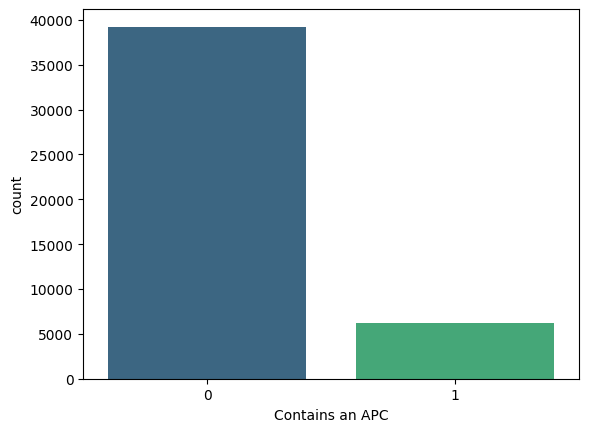

In [34]:
print(dwds.value_counts('instance'))
sns.countplot(dwds, x='instance', hue='instance', legend=False, palette='viridis')
plt.xlabel('Contains an APC');

In [35]:
persnumcount = dwds.groupby(['Person','Number','instance'])['No.'].size().reset_index(name='Count')

In [36]:
persnumcount

,Person,Number,instance,Count
0,1,pl,0,14247
1,1,pl,1,3696
2,1,sg,0,14447
3,1,sg,1,327
4,2,pl,0,2428
5,2,pl,1,200
6,2,sg,0,3568
7,2,sg,1,1756
8,2Hon,sg,0,1
9,2Hon,sg,1,1


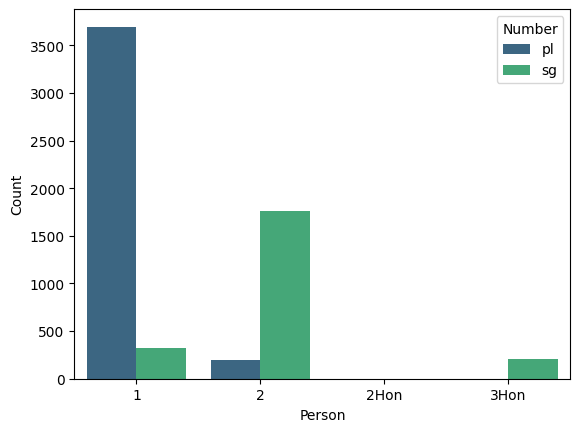

In [37]:
sns.barplot(persnumcount.loc[persnumcount.instance==1],x='Person',y='Count',hue='Number',errorbar=None,estimator='sum',palette='viridis');

For plural APCs, the first person is much more represented than the second person, while the opposite holds for singular APCs. The number contrast cannot be unambiguously and consistently determined, so the contrasts can be largely disregarded here. 

## Noun distribution

In [38]:
Nfreq_dwds = dwds.loc[dwds['instance']==1,'Nlemma'].value_counts()

In [39]:
Nfreq_dwds.describe()

count    1942.000000
mean        3.181771
std        15.708066
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       393.000000
Name: count, dtype: float64

In [40]:
dwds['Person'].unique()

array(['1', '2', '2Hon', '3Hon'], dtype=object)

In [41]:
# list Person and Number values of interest
persons = ['1', '2', '2Hon', '3Hon']
numbers = ['sg', 'pl']

# Start with overall counts (instance == 1)
counts = {}
counts['overall'] = dwds.loc[dwds['instance'] == 1, 'Nlemma'].value_counts()

# Compute counts for each Person–Number combination
for p in persons:
    for n in numbers:
        label = f'{p}_{n}'
        subset = dwds.loc[
            (dwds['Person'] == p) &
            (dwds['Number'] == n) &
            (dwds['instance'] == 1),
            'Nlemma'
        ]
        counts[label] = subset.value_counts()
        counts[label+'_rel'] = subset.value_counts(normalize=True)

# Combine all counts into one DataFrame
Nfreq_df = pd.DataFrame(counts).fillna(0)

# Cast only non-relative columns to int
for col in Nfreq_df.columns:
    if not col.endswith('_rel'):
        Nfreq_df[col] = Nfreq_df[col].astype(int)

# Optionally sort by overall frequency
Nfreq_df = Nfreq_df.sort_values(by='overall', ascending=False)
Nfreq_df.to_csv('GER_nounlist.csv')


In [42]:
display(Nfreq_df['overall'].head(5))
# top 5 for each feature combination
for p in persons:
    for n in numbers:
        label=f'{p}_{n}'
        display(Nfreq_df[[label,label+'_rel']].sort_values(by=label,ascending=False).head(5))

Nlemma
deutsch    393
Mensch     391
Kind       269
Mann       150
Frau       141
Name: overall, dtype: int64

,1_sg,1_sg_rel
Nlemma,,
Mann,17,0.051988
Idiot,13,0.039755
Trottel,13,0.039755
Mensch,11,0.033639
Junge,11,0.033639


,1_pl,1_pl_rel
Nlemma,,
deutsch,382,0.103439
Mensch,372,0.100731
Kind,242,0.065529
Frau,123,0.033306
Mann,110,0.029786


,2_sg,2_sg_rel
Nlemma,,
Hund,54,0.030857
Schwein,41,0.023429
Narr,30,0.017143
arm,21,0.012000
Aas,20,0.011429


,2_pl,2_pl_rel
Nlemma,,
Leute,9,0.045
Frau,7,0.035
deutsch,7,0.035
Kerl,6,0.030
Mann,5,0.025


,2Hon_sg,2Hon_sg_rel
Nlemma,,
unwürdig,1,1.0
Geschäftsreisende,0,0.0
Gesellschaft,0,0.0
Gewerkschaftsführer,0,0.0
Gewöhnlichkeit,0,0.0


,2Hon_pl,2Hon_pl_rel
Nlemma,,
Last,0,0.0
deutsch,0,0.0
Mensch,0,0.0
Kind,0,0.0
Mann,0,0.0


,3Hon_sg,3Hon_sg_rel
Nlemma,,
Idiot,7,0.033981
Mensch,7,0.033981
Mann,6,0.029126
Schwein,5,0.024272
Ochse,5,0.024272


,3Hon_pl,3Hon_pl_rel
Nlemma,,
Siedler,1,0.5
Bruder,1,0.5
Geschäftsreisende,0,0.0
Gesellschaft,0,0.0
Gewerkschaftsführer,0,0.0


In [43]:
display(Nfreq_df['overall'].tail(5))
# top 5 for each feature combination
for p in persons:
    for n in numbers:
        label=f'{p}_{n}'
        display(Nfreq_df[[label,label+'_rel']].sort_values(by=label,ascending=True).head(5))

Nlemma
Lade      1
Lackel    1
Labsal    1
Laban     1
Last      1
Name: overall, dtype: int64

,1_sg,1_sg_rel
Nlemma,,
Götterfunken,0,0.0
Herbstblume,0,0.0
Herold,0,0.0
Heiland,0,0.0
Herr Jesus,0,0.0


,1_pl,1_pl_rel
Nlemma,,
gebärend,0,0.0
geduldig,0,0.0
Vergessensein,0,0.0
Verehrer,0,0.0
Verderben,0,0.0


,2_sg,2_sg_rel
Nlemma,,
Student,0,0.0
Kunstmensch,0,0.0
Kumpel,0,0.0
Kuh,0,0.0
Kröppel,0,0.0


,2_pl,2_pl_rel
Nlemma,,
Hamburger,0,0.0
Hilfslehrer,0,0.0
Himmelchen,0,0.0
Himmelvater,0,0.0
Hirte,0,0.0


,2Hon_sg,2Hon_sg_rel
Nlemma,,
Heimfahrt,0,0.0
Gentlemen,0,0.0
Gerumpel,0,0.0
Geschäftsreisende,0,0.0
Gesellschaft,0,0.0


,2Hon_pl,2Hon_pl_rel
Nlemma,,
Krapp,0,0.0
Krabbe,0,0.0
Kostbube,0,0.0
Korrespondent,0,0.0
Kujon,0,0.0


,3Hon_sg,3Hon_sg_rel
Nlemma,,
Hallodri,0,0.0
Hilfslehrer,0,0.0
Himmelchen,0,0.0
Himmelvater,0,0.0
Hirte,0,0.0


,3Hon_pl,3Hon_pl_rel
Nlemma,,
Heimfahrt,0,0.0
Gentlemen,0,0.0
Gerumpel,0,0.0
Geschäftsreisende,0,0.0
Gesellschaft,0,0.0


In [44]:
print(Nfreq_df.index.to_list())

['deutsch', 'Mensch', 'Kind', 'Mann', 'Frau', 'heutig', 'Nationalsozialist', 'Sozialdemokrat', 'Junge', 'Hund', 'Europäer', 'Schwein', 'Leute', 'Soldat', 'Mädchen', 'arm', 'Narr', 'jung', 'Amerikaner', 'Kommunist', 'alt', 'erwachsen', 'Idiot', 'Kerl', 'Christ', 'Jude', 'Arzt', 'Verteidiger', 'Lump', 'Schüler', 'Trottel', 'Weib', 'Gott', 'Österreicher', 'Esel', 'Arbeiter', 'Student', 'Aas', 'Bruder', 'Sünder', 'Mensch ', 'Franzose', 'Ochse', 'Schuft', 'Bub', 'Künstler', 'Sozialist', 'Tor', 'Volk', 'Stadt', 'Eltern', 'andere', 'Zögling', 'Pole', 'Knabe', 'Sau', 'Ding', 'Tier', 'Tropf', 'Dummkopf', 'Kamel', 'Herr', 'Professor', 'Hausfrau', 'Luder', 'fremd', 'Teufel', 'Geschwister', 'Zögling ', 'klein', 'Demokrat', 'Wald', 'Bauer', 'sterblich', 'Schaf', 'Seele', 'Schriftsteller', 'Offizier', 'tot', 'Bayer', 'Mädel', 'Schlingel', 'Lauretz', 'Bürger', 'Mutter', 'Schwester', 'Lehrer', 'Lausbub', 'gut', 'Geist', 'Lümmel', 'Dussel', 'Mörder', 'Bursche', 'lieb', 'Leser', 'Land', 'Spanier', 'Dich

In [45]:
dwds.loc[dwds['Nlemma']=='Lauretz'].head(3)

,Search,No.,Date,Genre,Bibl,ContextBefore,Hit,ContextAfter,instance,APC,...,AdjPost2,AdjModStrength,Quant,QuantPos,PreN-other,PreN-weight,ClauseType,VerbPos,Func,Position
ID,,,,,,,,,,,,,,,,,,,,,
20643,wir $p=N*,494,1934-12-31,Belletristik,"Knittel, John: Via Mala, Berlin: Deutsche Buch-Gemeinschaft 1957 [1934], S. 409",Ich hab keinen gehabt.,"Wir Lauretze ...""","""Auch Muattr hat einen schlimmen Unfall gehabt"", unterbrach ihn Hanna.",1,wir Lauretze,...,NaN,NaN,NaN,NaN,NaN,NaN,subclaus,NaN,excl,iso
20644,wir $p=N*,495,1934-12-31,Belletristik,"Knittel, John: Via Mala, Berlin: Deutsche Buch-Gemeinschaft 1957 [1934], S. 545","Er sah zu seiner Schwester zurück mit wütendem, fast fanatischem Blick.","""Wir Lauretz' sind Märtyrer, Blutzeugen!""",Er spuckte aus.,1,wir Lauretz',...,NaN,NaN,NaN,NaN,NaN,NaN,main,V2,subj,pref
20645,wir $p=N*,496,1934-12-31,Belletristik,"Knittel, John: Via Mala, Berlin: Deutsche Buch-Gemeinschaft 1957 [1934], S. 570","""Und wir haben es auch nicht getan.","Wir Lauretz' halten unser Versprechen!""",Andi betrachtete seinen Siegelring.,1,wir Lauretz',...,NaN,NaN,NaN,NaN,NaN,NaN,main,V2,subj,pref
